In [2]:
!wget -nc https://raw.githubusercontent.com/Katiechong/PSTAT-134-project-/master/movie_metadata_1.csv

File ‘movie_metadata_1.csv’ already there; not retrieving.



In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
#from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
#from nltk.stem.snowball import SnowballStemmer
#from nltk.stem.wordnet import WordNetLemmatizer
#from nltk.corpus import wordnet

import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords
#from wordcloud import WordCloud
#from textblob import TextBlob
#from textblob import Word
from nltk.stem import PorterStemmer
from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV


[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
import pandas as pd ## call pandas functions using "pd"
import numpy as np  ## call numpy functions using "np"
movie = pd.read_csv("movie_metadata_1.csv")

In [5]:
movie.iloc[0:3]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,NaN,160000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",http://inceptionmovie.warnerbros.com/,27205,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",...,7/14/2010,825532764,148.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Your mind is the scene of the crime.,Inception,False,8.1,14075
1,False,"{'id': 263, 'name': 'The Dark Knight Collectio...",185000000,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",http://thedarkknight.warnerbros.com/dvdsite/,155,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,...,7/16/2008,1004558444,152.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Why So Serious?,The Dark Knight,False,8.3,12269
2,False,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",...,12/10/2009,2787965087,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,Avatar,False,7.2,12114


In [6]:
movie['genres'] = movie['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
movie['production_countries'] = movie['production_countries'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
movie['production_companies'] = movie['production_companies'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [7]:
movie.iloc[0:3]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,NaN,160000000,"[Action, Thriller, Science Fiction, Mystery, A...",http://inceptionmovie.warnerbros.com/,27205,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",...,7/14/2010,825532764,148.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Your mind is the scene of the crime.,Inception,False,8.1,14075
1,False,"{'id': 263, 'name': 'The Dark Knight Collectio...",185000000,"[Drama, Action, Crime, Thriller]",http://thedarkknight.warnerbros.com/dvdsite/,155,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,...,7/16/2008,1004558444,152.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Why So Serious?,The Dark Knight,False,8.3,12269
2,False,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",...,12/10/2009,2787965087,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,Avatar,False,7.2,12114


In [8]:
list(movie.columns.values)

['adult',
 'belongs_to_collection',
 'budget',
 'genres',
 'homepage',
 'id',
 'imdb_id',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'poster_path',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'video',
 'vote_average',
 'vote_count']

In [9]:
movie_sub=movie[['adult',
 'budget',
 'genres',
 'id',
 'imdb_id',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'status',
 'title',
 'video',
 'vote_average',
 'vote_count']]

In [10]:
movie_sub.iloc[0:3]

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,video,vote_average,vote_count
0,False,160000000,"[Action, Thriller, Science Fiction, Mystery, A...",27205,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",29.108149,"[Legendary Pictures, Warner Bros., Syncopy]","[United Kingdom, United States of America]",7/14/2010,825532764,148.0,Released,Inception,False,8.1,14075
1,False,185000000,"[Drama, Action, Crime, Thriller]",155,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,123.167259,"[DC Comics, Legendary Pictures, Warner Bros., ...","[United Kingdom, United States of America]",7/16/2008,1004558444,152.0,Released,The Dark Knight,False,8.3,12269
2,False,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",185.070892,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",12/10/2009,2787965087,162.0,Released,Avatar,False,7.2,12114


In [11]:
#remove missing value
movie_1=movie_sub.dropna()
len(movie_1)

25751

In [32]:
#create recommendation system:
#outline:
#2,find similar movies using genre
#1,textming outline(LDA/NFM to extract topics, find similar topics)
#3,exploratory analysis(correlations between variables)
#movie_genre=movie_1[["original_title","genres"]]
movie_overview=movie_1.iloc[0:2000,:][["original_title","overview"]]

In [33]:
#textming overview:
#preprocessing:

# use natural language process package
import nltk
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
#instaLL wordcloud using pip install wordcloud
from wordcloud import WordCloud

In [34]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [35]:
movie_overview.iloc[0:3]

,original_title,overview
0,Inception,"Cobb, a skilled thief who commits corporate es..."
1,The Dark Knight,Batman raises the stakes in his war on crime. ...
2,Avatar,"In the 22nd century, a paraplegic Marine is di..."


**Text data preprocessing**

In [36]:
#The data has already remove missing data
#Lowercase:
movie_overview['overview'] = movie_overview['overview'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [37]:
# Removing punctuation
movie_overview['overview'] = movie_overview['overview'].str.replace('[^\w\s]','')


In [38]:
#remove stopwords
stop_nltk = list(stop_words.ENGLISH_STOP_WORDS)
movie_overview['overview'] = movie_overview['overview'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_nltk))

In [39]:
movie_overview["overview"][0]

'cobb skilled thief commits corporate espionage infiltrating subconscious targets offered chance regain old life payment task considered impossible inception implantation persons idea targets subconscious'

**Create Wordcloud to visualize high frequency words in overviews**

In [40]:
movie_overview["overview"].to_csv('overview_clean.txt', index=False, sep=' ', header=None)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [41]:
f = open('overview_clean.txt','r',encoding='utf-8').read()
word_tokens = word_tokenize(f) 
wl_space_split = " ".join(word_tokens)

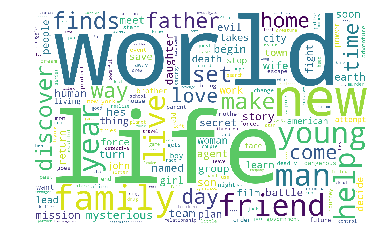

In [42]:
#create wordcloud
#it seems the data is clean and show some major topics that appears in many movies
overview_wc = WordCloud(
        background_color="white",
        width=1500,             
        height=960,              
        margin=10               
        ).generate(wl_space_split)
plt.figure()
plt.imshow(overview_wc)
plt.axis("off")
plt.show()
overview_wc.to_file('overview_wc.png')

**NMF: extracting topics from overviews**

In [43]:
# Function to display topics in a clear manner
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx + 1))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
no_features = 1000
no_topics = 5
no_top_words = 10

## code found in https://gist.github.com/aneesha/a54e7e182ddf564f6a5c1fe50db556a2

In [44]:
# TFIDF for NMF (EXPERIMENATION)

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=10)
tfidf_nmf = tfidf_vectorizer.fit_transform(movie_overview["overview"])


import sklearn.decomposition as skld
model = skld.NMF(n_components=10, init='nndsvda', max_iter=500, random_state=0)
# NMF algorithm (EXPERIMENATION)
nmf = model.fit_transform(tfidf_nmf)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()



In [45]:
display_topics(model, tfidf_feature_names, no_top_words)

Topic 1:
life way meets live changes decides son love discovers turned
Topic 2:
world war ii forces known set japanese film mysterious takes
Topic 3:
story love true based falls film tells american century tale
Topic 4:
family home child parents son father children protect house childhood
Topic 5:
new york city years gets eve start lives alice big
Topic 6:
young woman father boy finds named help mysterious daughter home
Topic 7:
agent fbi police cop hes detective drug case undercover murder
Topic 8:
friends school high best day girl night friend party just
Topic 9:
man woman alter takes years wife murder powerful days revenge
Topic 10:
team earth mission planet alien crew evil group battle stop


*The topic extracted is recognizable, for example Topic 3 tends to be love stories, while Topic 7 tends to be topic about war.*

In [ ]:
#Gridsearch to find the most suitable parameters for NMF:
#Or will find all the genres and use the number of genre as parameter of number of topics

In [46]:
W=np.matrix(tfidf_nmf.toarray())
H=np.matrix(model.components_.T)

In [47]:
W.shape

(2000, 1042)

In [48]:
H.shape

(1042, 10)

In [49]:
X_hat=W@H

In [50]:
X=X_hat.T

In [51]:
X.shape

(10, 2000)

In [52]:
shot_type_names = ['topic'+ str(i) for i in range(1,11)]
Xnew = pd.DataFrame(X)
Xnew.index = shot_type_names
Xnew.columns = list(movie_overview["original_title"])
X
Xnew

,Inception,The Dark Knight,Avatar,The Avengers,Deadpool,Interstellar,Django Unchained,Guardians of the Galaxy,Fight Club,The Hunger Games,...,G-Force,Cop Out,WarGames,The Kingdom,Lars and the Real Girl,Hereafter,The Lazarus Effect,Skyline,The Hundred-Foot Journey,Citizenfour
topic1,0.612448,0.042924,0.018032,0.077441,0.529834,0.084915,0.081320,0.137218,0.205003,0.469914,...,0.001703,0.137006,0.036127,0.013992,0.225530,0.128470,0.179360,0.147513,0.020972,0.083145
topic2,0.004585,0.199786,0.020211,0.262049,0.056793,0.052821,0.028338,0.024136,0.021670,0.232318,...,0.513841,0.022195,0.116981,0.035072,0.026278,0.048121,0.030591,0.289130,0.027543,0.029860
topic3,0.035467,0.018050,0.066131,0.051201,0.263146,0.010262,0.025095,0.081968,0.003239,0.143525,...,0.009262,0.039335,0.064661,0.070588,0.708203,0.158810,0.044991,0.023737,0.368319,0.135471
topic4,0.017615,0.025084,0.021302,0.043743,0.035347,0.043881,0.040514,0.046834,0.015717,0.150925,...,0.033236,0.023991,0.014202,0.015517,0.038770,0.054269,0.054061,0.057046,0.360400,0.039223
topic5,0.020217,0.079196,0.011215,0.065399,0.247514,0.009191,0.017150,0.080693,0.452649,0.045245,...,0.037279,0.050352,0.038890,0.020755,0.044932,0.018885,0.049907,0.212603,0.036357,0.054024
topic6,0.019936,0.093041,0.000000,0.069694,0.029778,0.049061,0.095103,0.070432,0.046528,0.105504,...,0.063369,0.031895,0.025146,0.027650,0.148620,0.128292,0.065137,0.066741,0.034812,0.050527
topic7,0.093764,0.231517,0.026149,0.095833,0.082446,0.067350,0.225393,0.044588,0.053345,0.080437,...,0.303692,0.185127,0.121861,0.152893,0.106320,0.061806,0.143967,0.146342,0.037268,0.079603
topic8,0.031540,0.051542,0.002466,0.053284,0.054366,0.131187,0.070909,0.095610,0.104401,0.153728,...,0.051919,0.153307,0.272633,0.037096,0.275108,0.187644,0.076169,0.081226,0.025893,0.070683
topic9,0.003956,0.040556,0.032107,0.017499,0.355090,0.059011,0.077741,0.092311,0.048138,0.039518,...,0.032795,0.048999,0.011213,0.019290,0.059902,0.069546,0.036485,0.038539,0.009540,0.068650
topic10,0.043164,0.071058,0.332600,0.268253,0.096696,0.223583,0.069556,0.305406,0.178535,0.212283,...,0.569795,0.117895,0.170158,0.318459,0.084112,0.111128,0.288823,0.388282,0.009983,0.055888


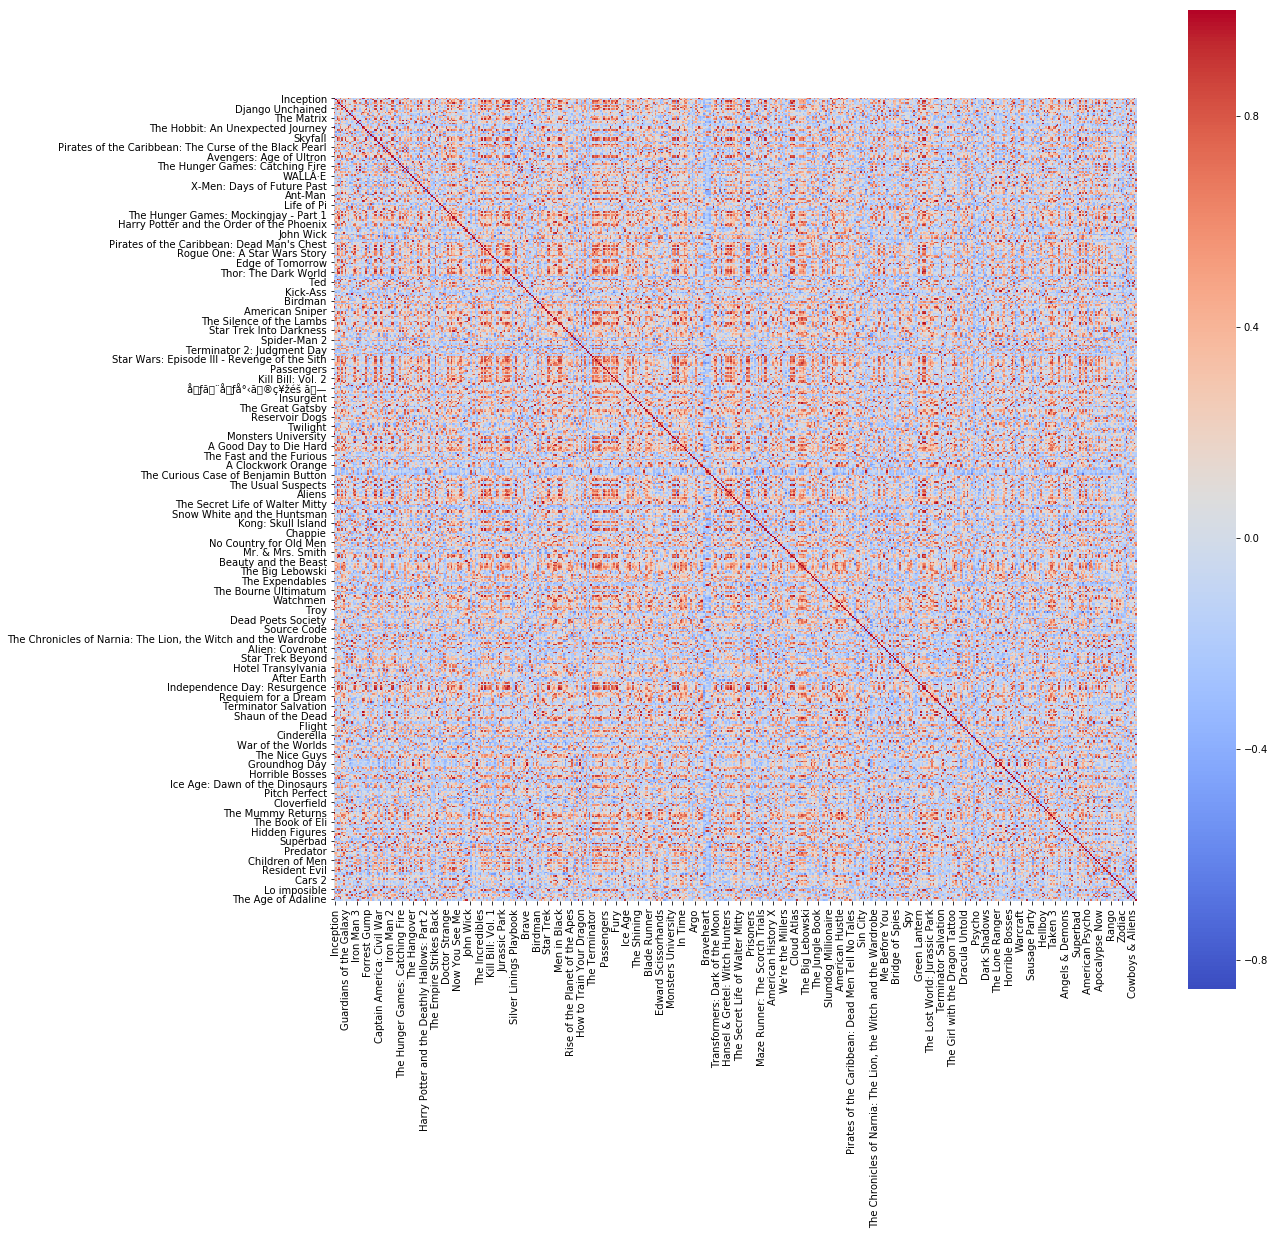

In [53]:
#visualization parts of correlations between movies(because the whole dataset has 25751 movies,which will cause the kernal to die):
Xnew_part=Xnew.iloc[:,0:500]
topic_movie_corr = Xnew_part.corr()
plt.figure(figsize=(18,18))
ax = sns.heatmap(topic_movie_corr, square=True, cmap="coolwarm")

In [54]:
topic_movie_corr

,Inception,The Dark Knight,Avatar,The Avengers,Deadpool,Interstellar,Django Unchained,Guardians of the Galaxy,Fight Club,The Hunger Games,...,Zodiac,Percy Jackson & the Olympians: The Lightning Thief,Lo imposible,Riddick,Big Fish,Allegiant,Mission: Impossible III,Cowboys & Aliens,The Age of Adaline,ãƒã‚¦ãƒ«ã®å‹•ãåŸŽ
Inception,1.000000,-0.139010,-0.093876,-0.083079,0.712413,0.097304,0.158871,0.189681,0.228687,0.844866,...,0.009737,0.172945,-0.177459,-0.178996,0.537301,-0.095561,-0.045821,-0.129103,0.851364,-0.039918
The Dark Knight,-0.139010,1.000000,-0.101647,0.484894,-0.398620,-0.022737,0.570141,-0.316230,-0.112616,-0.117892,...,0.171016,0.648250,-0.396709,0.008212,-0.426344,0.629450,0.075636,0.583214,-0.288423,-0.051684
Avatar,-0.093876,-0.101647,1.000000,0.633849,-0.101376,0.768512,-0.042909,0.899598,0.100758,0.125408,...,-0.034500,-0.189142,-0.020091,0.941075,-0.187143,-0.093353,0.467876,0.201680,-0.135447,-0.191711
The Avengers,-0.083079,0.484894,0.633849,1.000000,-0.323153,0.546753,-0.072844,0.437566,0.011259,0.308027,...,-0.202527,0.526766,-0.236705,0.609930,-0.462299,0.682621,0.260570,0.817562,-0.244773,-0.177767
Deadpool,0.712413,-0.398620,-0.101376,-0.323153,1.000000,-0.174721,-0.126074,0.158550,0.342483,0.437943,...,0.070738,0.068051,-0.293673,-0.309600,0.832476,-0.283905,0.078621,-0.435865,0.866059,-0.256069
Interstellar,0.097304,-0.022737,0.768512,0.546753,-0.174721,1.000000,0.187586,0.830202,0.040590,0.304511,...,-0.312040,-0.199870,-0.016377,0.819281,-0.112974,-0.056974,0.239918,0.280107,0.061100,-0.122815
Django Unchained,0.158871,0.570141,-0.042909,-0.072844,-0.126074,0.187586,1.000000,-0.057504,-0.226372,-0.107052,...,0.368509,-0.088348,-0.220501,0.114118,0.035737,-0.146617,-0.035937,-0.044638,0.093919,0.120224
Guardians of the Galaxy,0.189681,-0.316230,0.899598,0.437566,0.158550,0.830202,-0.057504,1.000000,0.307165,0.299366,...,-0.194850,-0.269202,-0.101404,0.832192,0.063485,-0.286625,0.486286,0.052768,0.178351,-0.100230
Fight Club,0.228687,-0.112616,0.100758,0.011259,0.342483,0.040590,-0.226372,0.307165,1.000000,0.034108,...,-0.262244,0.307938,-0.224392,0.069679,-0.028972,-0.237923,0.845049,-0.203390,0.150397,-0.170300
The Hunger Games,0.844866,-0.117892,0.125408,0.308027,0.437943,0.304511,-0.107052,0.299366,0.034108,1.000000,...,-0.142301,0.264449,-0.064995,0.021265,0.264098,0.241902,-0.175176,0.254372,0.628923,-0.084935


**Find similarities between movies**

In [70]:
allcorr = Xnew.corr()
inception_s = allcorr[allcorr['Inception'] > 0.99]['Inception'].sort_values(ascending=False)
inception_s

Inception                                  1.000000
The Gambler                                0.998077
Casino                                     0.997011
Yes Man                                    0.996049
Star Trek II: The Wrath of Khan            0.995533
Burnt                                      0.994262
The Secret Life of Walter Mitty            0.994093
Walk the Line                              0.993029
What We Do in the Shadows                  0.992750
The Butler                                 0.992065
Harry Potter and the Chamber of Secrets    0.992019
Bedtime Stories                            0.991629
Shaun of the Dead                          0.991072
Anger Management                           0.991022
The Mask                                   0.990998
X-Men Origins: Wolverine                   0.990157
Name: Inception, dtype: float64

In [72]:
vec_normalize = lambda x : x/sum(x)
Xnorm = Xnew.apply(vec_normalize)
vec_entropy = lambda x: sum(x*np.log(x + 0.00000001))*-1 
entropy =  Xnorm.apply(vec_entropy,axis=0)

Text(0.5, 1.0, 'inception-like movies')

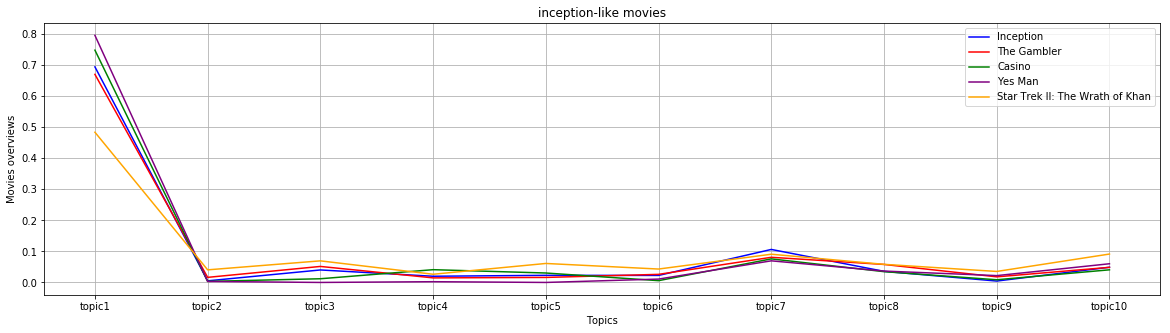

In [75]:
#plot five similar movies with the shape of correspongding topics
def plot_similar(df,like_list):
    x = list(df.index)
    color = ['blue', 'red', 'green', 'purple', 'orange']
    plt.grid()
    for i in range(df[like_list].shape[1]):
        y = df[like_list].iloc[:,i]
        plt.plot(x,y,color = color[i])
        plt.legend()
        plt.xlabel('Topics')
        plt.ylabel('Movies overviews')
    return    

figure = plt.figure(figsize=(20,5))

## Plot for Curry-like players
inception_similarity = list(allcorr[allcorr['Inception'] > 0.99]['Inception'].sort_values(ascending=False).index)[0:5]
#figure.add_subplot(1,2,1)
plot_similar(Xnorm,inception_similarity)
plt.title('inception-like movies')

## Plot for Biyombo-like players
#figure.add_subplot(1, 2, 2)
#plot_similar(Hnorm,biyo_similar)
#plt.title('Biyombo-like players');
#figure = plt.figure(figsize=(20,5))